In [ ]:
#image clustering
#Creates 4 groups of photos, groups by content similarly. Prints 7 of each group on screen and to png file
#Then matches one images to all, selecting 5 closest. No reprocessing of corpus
# is needed so can be re-run quickly, changing file name of photos to match.
#orginal picture is displayed, then 5 matches.
#currently doesn't print matches to file

In [ ]:
#Load the Drive helper and mount
from google.colab import drive#

# This will prompt for authorization.
#drive.mount('/content/drive/')
drive.mount('/content/drive/', force_remount=True)


Mounted at /content/drive/


In [ ]:
#set up paths
analys_path = "/content/drive/MyDrive/Colab Notebooks/AIGriffis/analysis"
folder_path ="/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/GriffisJapanesephotos"
text_path ="/content/drive/MyDrive/Colab Notebooks/AIGriffis/data"


In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

1/1 [==============================] - 1s 573ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster images saved to /content/drive/MyDrive/Colab Notebooks/AIGriffis/data/Cluster {cluster+1}.png


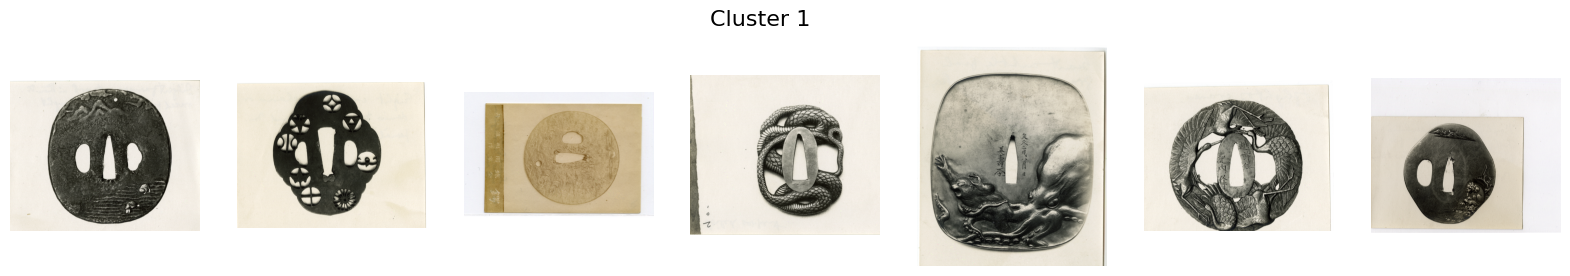

Cluster images saved to /content/drive/MyDrive/Colab Notebooks/AIGriffis/data/Cluster {cluster+1}.png


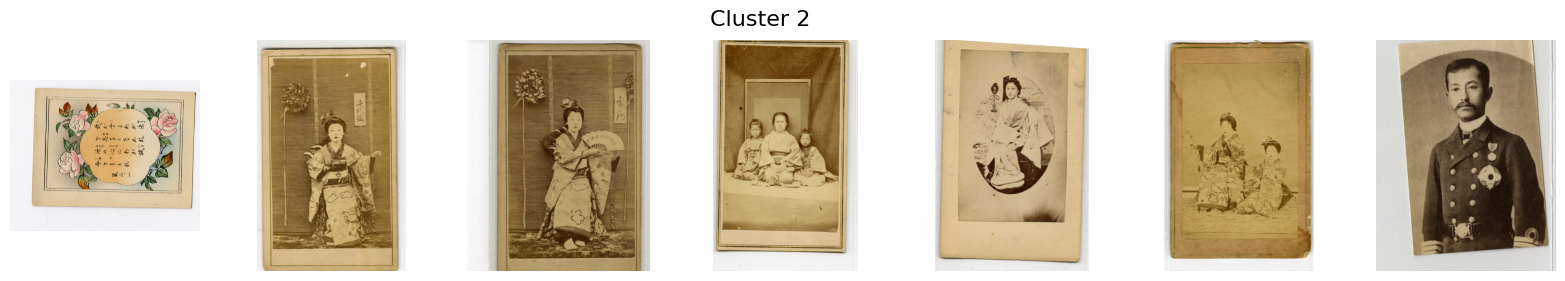

Cluster images saved to /content/drive/MyDrive/Colab Notebooks/AIGriffis/data/Cluster {cluster+1}.png


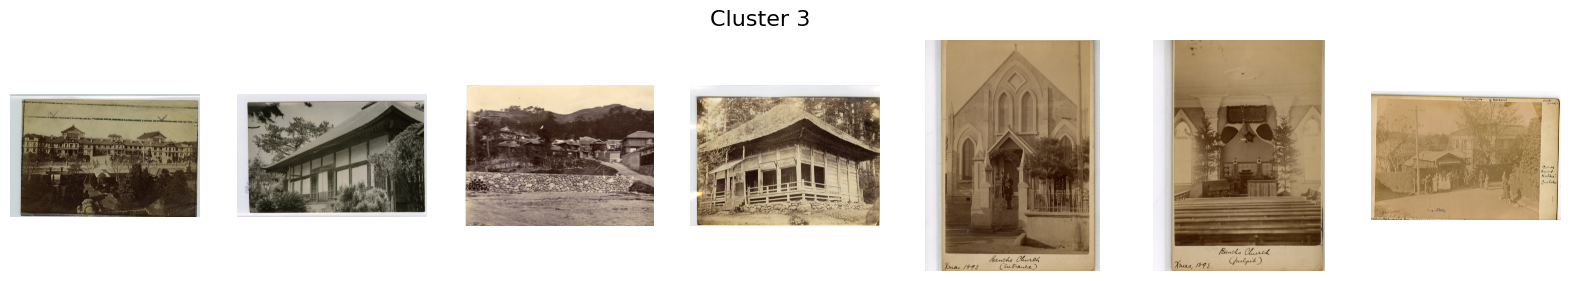

Cluster images saved to /content/drive/MyDrive/Colab Notebooks/AIGriffis/data/Cluster {cluster+1}.png


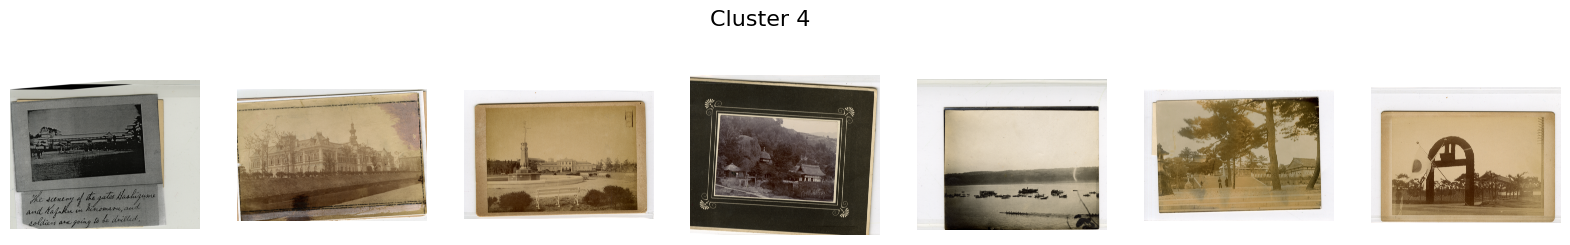

In [ ]:

# Load VGG16 model
model = VGG16(weights='imagenet', include_top=False)

# Function to extract features from an image
def extract_features(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    return flattened_features

# Directory containing images
image_directory = folder_path
images = [os.path.join(image_directory, p) for p in sorted(os.listdir(image_directory)) if p.endswith('.tif')]

# Extract features from the images
features = np.array([extract_features(img, model) for img in images])

# Cluster the images
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=22)
clusters = kmeans.fit_predict(features)

# Plot 7 images from each cluster
for cluster in range(num_clusters):
    fig, axs = plt.subplots(1, 7, figsize=(20, 3))
    fig.suptitle(f'Cluster {cluster+1}', fontsize=16)
    cluster_images = [img for img, label in zip(images, clusters) if label == cluster][:7]
    for ax, img in zip(axs, cluster_images):
        ax.imshow(plt.imread(img))
        ax.axis('off')
     # Save to a file
    ofile=text_path + '/Cluster' + str(cluster) +'.png'
    plt.savefig(ofile)
    print(f"Cluster images saved to {ofile}")
    plt.show()


1/1 [==============================] - 1s 578ms/step


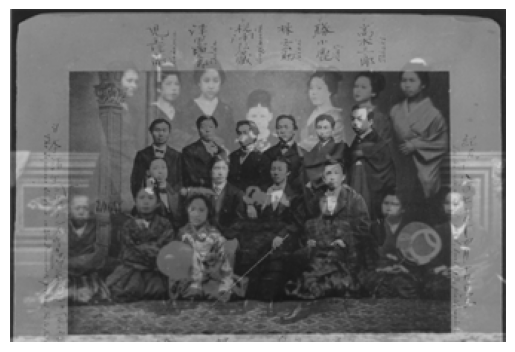

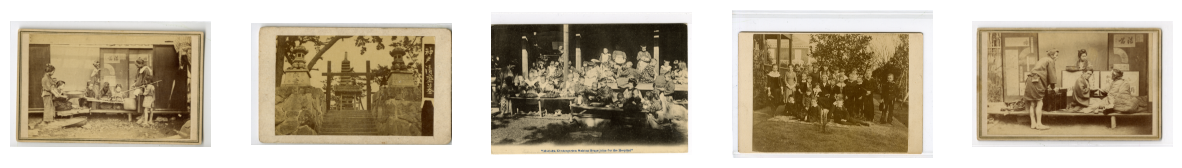

In [ ]:
from PIL import Image

# Function to find the most similar images
def find_similar_images(user_image, features, images, num_results=5):
    user_features = extract_features(user_image, model)
    similarities = cosine_similarity([user_features], features)[0]
    indices = np.argsort(similarities)[::-1][1:num_results+1]
    similar_images = [images[i] for i in indices]

    plt.figure(figsize=(15, 10))
    for i, similar_image in enumerate(similar_images):
        plt.subplot(1, num_results, i+1)
        plt.imshow(plt.imread(similar_image))
        plt.axis('off')
    plt.show()


# Ask user for an image path
#user_image_path = input("Enter the path of the image: ")
#put file to matched in different folder so doesn't try to match itself
#put file to matched in different folder so doesn't try to match itself
input_file = "/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/overlay224sq.tif"
#input_file = "/content/drive/MyDrive/Colab Notebooks/AIGriffis/data/dalle023landscapeimage.jpg"
user_image_path=input_file
img = Image.open(user_image_path)
plt.axis('off')
plt.imshow(img)
find_similar_images(user_image_path, features, images)
